# 4. Stitch outputs together
- Once you have fitted the weak, medium and dense diads, stitch them all together, and apply the Ne correction model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import joblib
import DiadFit as pf
pf.__version__

'1.0.5'

In [2]:
# Load in settings, paths, file extensions etc. that you saved in step 1
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in specra, and combine

In [3]:
import os
df2=pf.merge_fit_files(path=os.getcwd())
df2.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Diad1_Asym70,Diad1_Yuan2017_sym_factor,Diad1_Remigi2021_BSF,Diad2_Asym50,Diad2_Asym70,Diad2_Yuan2017_sym_factor,Diad2_Remigi2021_BSF,Diad1_PDF_Model,Diad2_PDF_Model,Standard
0,LL8-3b-FI#1_CRR_DiadFit,103.192879,0.003019,1285.701609,0.002709,1335.738849,1285.701659,1817.581898,0.526322,5.418918,...,1.109223,0.132892,0.000788,1.231047,1.239437,0.202031,0.000372,PseudoVoigtModel,PseudoVoigtModel,No
1,LL8-3b-FI#2_CRR_DiadFit,103.206065,0.002393,1285.676576,0.002111,1270.045714,1285.676626,1729.145614,0.526493,3.534356,...,1.096618,0.101789,0.000829,1.207018,1.214286,0.181433,0.000381,PseudoVoigtModel,PseudoVoigtModel,No
2,LL8-3b-FI#3,103.152838,0.006421,1285.822378,0.005582,545.255125,1285.822428,664.378173,0.462627,3.375707,...,1.226064,0.206672,0.001697,1.199203,1.266055,0.170261,0.000973,PseudoVoigtModel,PseudoVoigtModel,No
3,LL8-3b-FI#4_CRR_DiadFit,103.144729,0.006979,1285.832432,0.005967,589.507646,1285.832482,716.999218,0.496417,4.620044,...,1.143577,0.151013,0.001684,1.189723,1.243902,0.164449,0.000889,PseudoVoigtModel,PseudoVoigtModel,No
4,LL8-3b-FI#5_CRR_DiadFit,103.192886,0.005164,1285.740526,0.004564,669.499509,1285.740576,886.990331,0.524930,4.421370,...,1.161692,0.186720,0.001568,1.248120,1.282799,0.220684,0.000778,PseudoVoigtModel,PseudoVoigtModel,No


## First, get the metadata for this day

In [4]:
# Put the common string you can in all your Ne lines here
diad_meta=pf.get_files(path=meta_path,
file_ext=meta_file_ext, exclude_str=['Ne', 'NE', 'Si', 'nodiad', 'Ne', 'Cap','window','Video', 'nodiad','diad','Series','no_diad','diad','Series','unquant','map','Series','broad'],
 sort=True)
diad_meta[0]

'07 LL8-3b-IMG5x.txt'

## Now get all the important information out of the metadata files

In [5]:
# This will only work for WITEC - for other vendors, you might have to use the file datastamp. See the HORIBA example
meta=pf.stitch_metadata_in_loop_witec(path=meta_path, 
Allfiles=diad_meta, prefix=prefix, str_prefix=str_prefix,
trupower=TruPower)
meta.head()

100%|██████████| 71/71 [00:00<00:00, 4342.56it/s]

Done


,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,LL8-3b-FI#1.txt,"November 3, 2022\n",November,3.0,12.057,45.0,5.0,50.0,"['0h', '3m', '47s']",11:50:48 AM\n,42648.0,1325.004
1,LL8-3b-FI#2.txt,"November 3, 2022\n",November,3.0,12.076,45.0,5.0,50.0,"['0h', '3m', '47s']",12:04:32 PM\n,43472.0,1325.004
2,LL8-3b-FI#3.txt,"November 3, 2022\n",November,3.0,11.971,45.0,5.0,50.0,"['0h', '3m', '47s']",12:25:39 PM\n,44739.0,1325.004
3,LL8-3b-FI#4.txt,"November 3, 2022\n",November,3.0,11.989,45.0,5.0,50.0,"['0h', '3m', '46s']",12:30:38 PM\n,45038.0,1325.004
4,LL8-3b-FI#5.txt,"November 3, 2022\n",November,3.0,12.014,45.0,5.0,50.0,"['0h', '3m', '47s']",12:37:56 PM\n,45476.0,1325.004


## Then get a simple file name you can stitch with the spectra

In [6]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_ext=meta_file_ext)
# Checks they are all unique
file_m[0]

good job, no duplicate file names


'LL8-3b-FI#1'

In [7]:
for i in range(len(file_m)):
    file_m[i] = file_m[i].replace("--Information", "")
file_m

array(['LL8-3b-FI#1', 'LL8-3b-FI#2', 'LL8-3b-FI#3', 'LL8-3b-FI#4',
       'LL8-3b-FI#5', 'LL8-FI37-#1', 'LL8-FI37-#2', 'LL8-FI37-#3',
       'LL8-FI236-FI#1', 'LL8-FI236-FI#2wmelt', 'LL8-P3609-FI#1_12mW',
       'LL8-P3609-FI#1_6mW', 'LL8-P3609-FI#2_12mW', 'LL8-P3609-FI#2_6mW',
       'LL8-P3609-FI#3_6mW', 'LL8-P3609-FI#3_12mW', 'LL8-601-FI#1',
       'LL8-601-FI#2_12mW', 'LL8-601-FI#2_6mW', 'LL8-601-FI#3wmelt',
       'LL8-P2636-FI#1', 'LL8-P2636-FI#2', 'LL8-P2636-FI#3',
       'LL8-P2636-FI#4', 'UW7-OX1-mX1-FI#1', 'UW7-OX1-mX1-FI#2',
       'UW7-OX1-mX2-FI#1', 'UW7-OX2-FI#1', 'UW7-OX2-FI#2',
       'UW7-OX3-FI#1-rep1', 'UW7-OX3-FI#1-rep2', 'UW7-OX3-FI#2'],
      dtype=object)

## Now get filename from spectra into same form as metadata

In [8]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    names=df2['filename'].reset_index(drop=True),
   file_ext=spectra_file_ext)

# Remove the cosmic rays, as doesnt have it in the metatdata
file_s = np.char.replace(file_s.astype(str), "_CRR_DiadFit", "")
print(file_s[0])

good job, no duplicate file names
LL8-3b-FI#1


In [9]:
for i in range(len(file_s)):
    file_s[i] = file_s[i].replace("--Spec.Data 1", "")
file_s

array(['LL8-3b-FI#1', 'LL8-3b-FI#2', 'LL8-3b-FI#3', 'LL8-3b-FI#4',
       'LL8-3b-FI#5', 'LL8-FI37-#1', 'LL8-FI37-#2', 'LL8-FI37-#3',
       'LL8-FI236-FI#1', 'LL8-FI236-FI#2wmelt', 'LL8-601-FI#2_6mW',
       'LL8-601-FI#3wmelt', 'LL8-P2636-FI#2', 'LL8-P2636-FI#3',
       'UW7-OX3-FI#1-rep1', 'UW7-OX3-FI#2', 'LL8-P3609-FI#1_12mW',
       'LL8-P3609-FI#1_6mW', 'LL8-P3609-FI#2_12mW', 'LL8-P3609-FI#2_6mW',
       'LL8-P3609-FI#3_6mW', 'LL8-P3609-FI#3_12mW', 'LL8-601-FI#1',
       'LL8-601-FI#2_12mW', 'LL8-P2636-FI#1', 'LL8-P2636-FI#4',
       'UW7-OX1-mX1-FI#1', 'UW7-OX1-mX1-FI#2', 'UW7-OX1-mX2-FI#1',
       'UW7-OX2-FI#1', 'UW7-OX2-FI#2', 'UW7-OX3-FI#1-rep2'], dtype='<U19')

In [10]:
# Combining them together, if the form above matches, e.g. checking one doesnt have a suffix and the other one does

meta['filename']=file_m
df2['filename']=file_s
df_combo=pd.merge(df2, meta, on='filename').reset_index(drop=True)
df_combo.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,LL8-3b-FI#1,103.192879,0.003019,1285.701609,0.002709,1335.738849,1285.701659,1817.581898,0.526322,5.418918,...,November,3.0,12.057,45.0,5.0,50.0,"['0h', '3m', '47s']",11:50:48 AM\n,42648.0,1325.004
1,LL8-3b-FI#2,103.206065,0.002393,1285.676576,0.002111,1270.045714,1285.676626,1729.145614,0.526493,3.534356,...,November,3.0,12.076,45.0,5.0,50.0,"['0h', '3m', '47s']",12:04:32 PM\n,43472.0,1325.004
2,LL8-3b-FI#3,103.152838,0.006421,1285.822378,0.005582,545.255125,1285.822428,664.378173,0.462627,3.375707,...,November,3.0,11.971,45.0,5.0,50.0,"['0h', '3m', '47s']",12:25:39 PM\n,44739.0,1325.004
3,LL8-3b-FI#4,103.144729,0.006979,1285.832432,0.005967,589.507646,1285.832482,716.999218,0.496417,4.620044,...,November,3.0,11.989,45.0,5.0,50.0,"['0h', '3m', '46s']",12:30:38 PM\n,45038.0,1325.004
4,LL8-3b-FI#5,103.192886,0.005164,1285.740526,0.004564,669.499509,1285.740576,886.990331,0.524930,4.421370,...,November,3.0,12.014,45.0,5.0,50.0,"['0h', '3m', '47s']",12:37:56 PM\n,45476.0,1325.004


## If you have secondary phases, now is the time to merge those in

In [11]:
df_combo_sec_phase=pf.merge_in_carb_SO2(
df_combo=df_combo, file1_name='Carb_Peak_fits.xlsx', file2_name='SO2_Peak_fits.xlsx', 
prefix=prefix, str_prefix=str_prefix, file_ext=spectra_file_ext)
#df_combo_sec_phase.to_excel('FI_fitting_w_sec_phases.xlsx', index=False)

Made a df!
good job, no duplicate file names


## If you have SO2, now is the time to calculate the molar proportion of SO2

In [12]:
if 'Peak_Area_SO2' in df_combo_sec_phase:
    

        SO2_mol_ratio=pf.calculate_SO2_CO2_ratio(SO2_area=df_combo_sec_phase['Peak_Area_SO2'], 
        diad1_area=df_combo_sec_phase['Diad1_Voigt_Area'], diad2_area=df_combo_sec_phase['Diad2_Voigt_Area'], 
                SO2_cross_sec=5.3, diad1_cross_sec=0.89, diad2_cross_sec=1.4)
        

        df_combo_sec_phase['SO2_mol_ratio']=SO2_mol_ratio

## Now we calculate the density using the UC Berkeley Densimeter. 
- If you have your own densimeter, I am happy to add a function for it if you email me (penny_wieser@berkeley.edu)
- This particular function propagates the uncertainty on 1) The neon line correction model 2) the peak fits of the diads themselves 3) The densimeter. 

In [13]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

5.90898694489278e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Peak_Cent_SO2,Peak_Area_SO2,Peak_Height_SO2,Model_name,SO2_Diad_Ratio,SO2_mol_ratio,time,preferred_values,lower_values,upper_values
0,LL8-3b-FI#1,0.094226,0.003993,0.001218,0.003802,102.988056,0.003075,0.000614,0.003019,12.057,...,NaN,NaN,NaN,NaN,NaN,NaN,42648.0,0.998015,0.998009,0.998021
1,LL8-3b-FI#2,0.099222,0.003928,0.000977,0.003804,103.000663,0.002465,0.000612,0.002393,12.076,...,NaN,NaN,NaN,NaN,NaN,NaN,43472.0,0.998010,0.998004,0.998016
2,LL8-3b-FI#3,0.077809,0.004580,0.002551,0.003803,102.946624,0.006437,0.000609,0.006421,11.971,...,NaN,NaN,NaN,NaN,NaN,NaN,44739.0,0.998001,0.997995,0.998007
3,LL8-3b-FI#4,0.074513,0.004707,0.002770,0.003805,102.938305,0.006992,0.000608,0.006979,11.989,...,NaN,NaN,NaN,NaN,NaN,NaN,45038.0,0.997999,0.997993,0.998005
4,LL8-3b-FI#5,0.093422,0.004322,0.002056,0.003802,102.986027,0.005189,0.000607,0.005164,12.014,...,NaN,NaN,NaN,NaN,NaN,NaN,45476.0,0.997995,0.997990,0.998001


In [14]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

5.90898694489278e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Peak_Cent_SO2,Peak_Area_SO2,Peak_Height_SO2,Model_name,SO2_Diad_Ratio,SO2_mol_ratio,time,preferred_values,lower_values,upper_values
0,LL8-3b-FI#1,0.094226,0.003993,0.001218,0.003802,102.988056,0.003075,0.000614,0.003019,12.057,...,NaN,NaN,NaN,NaN,NaN,NaN,42648.0,0.998015,0.998009,0.998021
1,LL8-3b-FI#2,0.099222,0.003928,0.000977,0.003804,103.000663,0.002465,0.000612,0.002393,12.076,...,NaN,NaN,NaN,NaN,NaN,NaN,43472.0,0.998010,0.998004,0.998016
2,LL8-3b-FI#3,0.077809,0.004580,0.002551,0.003803,102.946624,0.006437,0.000609,0.006421,11.971,...,NaN,NaN,NaN,NaN,NaN,NaN,44739.0,0.998001,0.997995,0.998007
3,LL8-3b-FI#4,0.074513,0.004707,0.002770,0.003805,102.938305,0.006992,0.000608,0.006979,11.989,...,NaN,NaN,NaN,NaN,NaN,NaN,45038.0,0.997999,0.997993,0.998005
4,LL8-3b-FI#5,0.093422,0.004322,0.002056,0.003802,102.986027,0.005189,0.000607,0.005164,12.014,...,NaN,NaN,NaN,NaN,NaN,NaN,45476.0,0.997995,0.997990,0.998001


### This cell saves the merged together dataframe with the folder name and the date you fitted it

In [15]:

from datetime import date
today = date.today()
today_str = today.strftime("%Y-%m-%d")
sorted_df = df.sort_values('sec since midnight')
date=meta['date'].iloc[0].replace('\n', '')
name='Raman_session_'+date+'_fitted_'+today_str+'.xlsx'
print(name)
# sorted_df=sorted_df[~(sorted_df['Corrected_Splitting']>106)]
sorted_df.to_excel(name)

Raman_session_November 3, 2022_fitted_2025-01-24.xlsx


## This helps visualize the errors on each spectra 

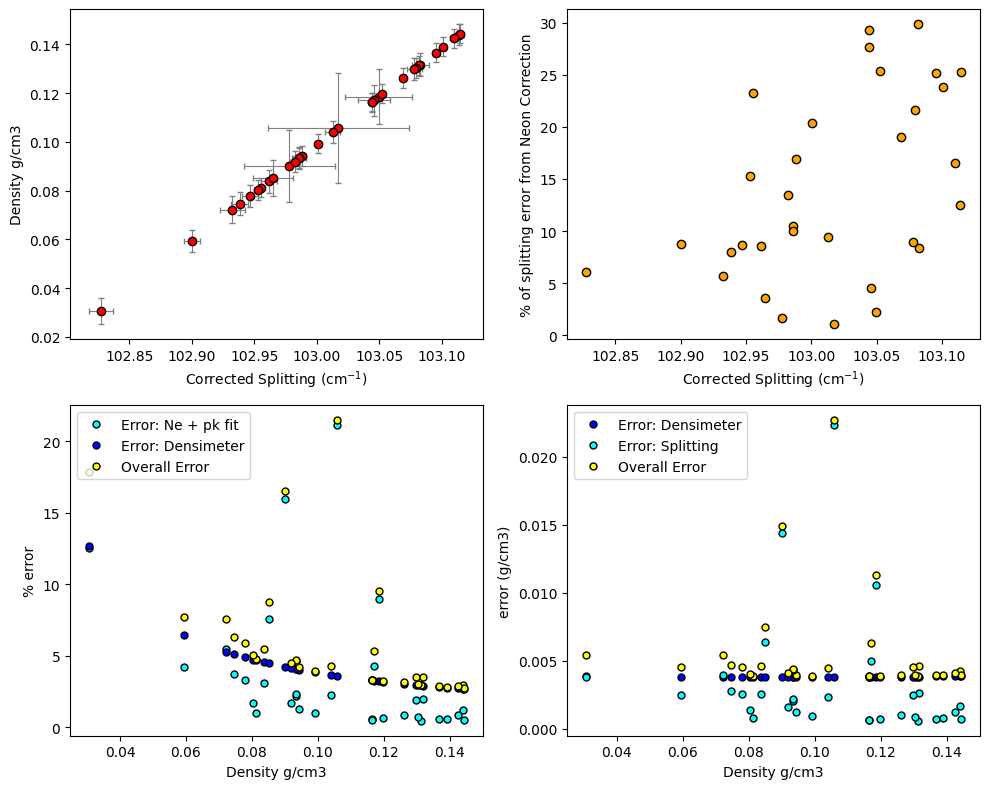

In [16]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

ax2.plot(df['Corrected_Splitting'], 
100*df['Corrected_Splitting_σ_Ne']/(df['Corrected_Splitting_σ_Ne']+df['Corrected_Splitting_σ_peak_fit']),
 'ok', mfc='orange')
ax2.set_ylabel('% of splitting error from Neon Correction')
ax2.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from Ne+peakfit)']/df['Density g/cm3'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')


ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from densimeter)']/df['Density g/cm3'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')

ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3']/df['Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax3.set_ylabel('% error')
ax3.set_xlabel('Density g/cm3')
ax3.legend()

ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from densimeter)'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from Ne+peakfit)'], 
'ok', mfc='cyan', ms=5, label='Error: Splitting')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax4.set_ylabel('error (g/cm3)')
ax4.set_xlabel('Density g/cm3')
ax4.legend()

fig.tight_layout()

## lets look at standards


Text(0, 0.5, 'Density g/cm3')

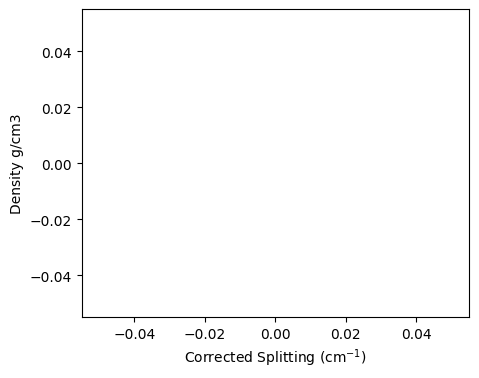

In [17]:
fig, (ax1) = plt.subplots(1, 1, figsize=(5,4))
df=sorted_df.loc[ sorted_df['Standard']=='Yes']
ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

In [18]:
df

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Peak_Cent_SO2,Peak_Area_SO2,Peak_Height_SO2,Model_name,SO2_Diad_Ratio,SO2_mol_ratio,time,preferred_values,lower_values,upper_values


In [19]:
df.to_clipboard(excel=True,index=False)

## If you were analysing fluid inclusions, lets calculate their pressures
- This bit isn't valid for melt inclusion vapour bubbles. 

Text(0, 0.5, '# of FI')

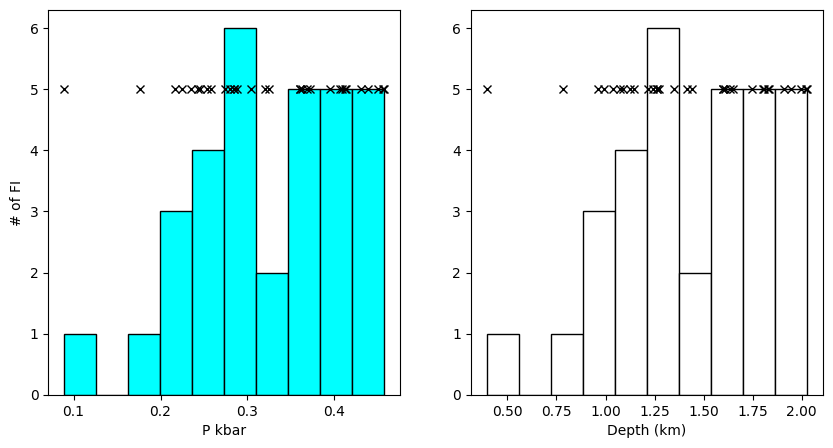

In [20]:
# Calculate pressure with a temperature estimate
Temp_C=1240
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

Pressure_SW96=pf.calculate_P_for_rho_T(T_K=Temp_C+273.15,
                CO2_dens_gcm3=df['Density g/cm3'],
                 EOS='SW96')
# Calculate depth from a crustal density assumption
Depth=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'], 
                crust_dens_kgm3=2300)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(Pressure_SW96['P_kbar'], ec='k', fc='cyan', bins=10)
ax1.plot(Pressure_SW96['P_kbar'], Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.plot(Depth, Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.hist(Depth, ec='k', fc='white', bins=10)
ax1.set_xlabel('P kbar')
ax2.set_xlabel('Depth (km)')
ax1.set_ylabel('# of FI')

In [21]:
import os

if os.name=="posix":

    def mac_notification(title, subtitle, message):
        """
        Display a macOS notification with the default sound using AppleScript.
        
        Args:
        - title: Title of the notification.
        - subtitle: Subtitle of the notification.
        - message: Main message content of the notification.
        """
        os.system("""
                osascript -e 'display notification "{}" with title "{}" subtitle "{}" sound name "default"'
                """.format(message, title, subtitle))

    mac_notification("Notebook Completed", "VSCode", "Step4 Stitch outputs")

else:

    # %pip install winotify

    from winotify import Notification, audio

    toast= Notification(app_id="VSCode",title="Notebook completed",
                        msg="Step4 Stitch outputs is done!",
                        duration="short")
    toast.set_audio(audio.Mail,loop=False)
    toast.show()